<a href="https://colab.research.google.com/github/srbee/python/blob/master/mannMorrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mann and Morrison Algorithm

42
[ 0.         45.11206444 45.09527312 45.06918854 45.03636397 45.
 44.96363603 44.93081146 44.90472688 44.88793556 44.88209356 44.88779294
 44.90449612 44.9305807  44.96349341 45.         45.03650659 45.0694193
 45.09550388 45.11220706 45.11790644 45.11206444 45.09527312 45.06918854
 45.03636397 45.         44.96363603 44.93081146 44.90472688 44.88793556
 44.88209356 44.88779294 44.90449612 44.9305807  44.96349341 45.
 45.03650659 45.0694193  45.09550388 45.11220706 45.11790644  0.        ]


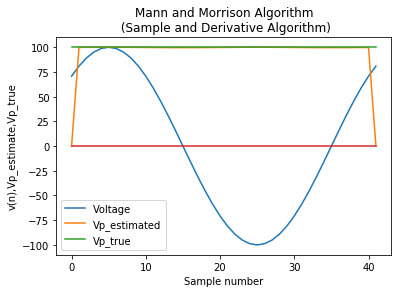

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt 

pi=np.pi
e=math.exp(1)
#print(pi,e)
fsig=50
nyquist=40   # sampling factor 
fsamp=nyquist*fsig
dt=1/fsamp #  sampling at twice signal frequency
w=2*pi*fsig
start=0
stop=21e-3
#dt=1e-3
step=dt
t=np.arange(start,stop,step)


wt=w*t
phi_deg=45
phi=np.radians(phi_deg)
#print(wt)
Vp=100

v=Vp*np.sin(wt+phi)    # v      : voltage samples
vd=np.zeros_like(v)    # v_dash:first derivative of voltage samples
vdByw=np.zeros_like(v) # v_dash/w

#====== Initialize all the arrays to zero ===================
vmag_err_pc=np.zeros_like(v)
Vp_est  = np.zeros_like(v)
ph_est  = np.zeros_like(v)
ph_est_deg=np.zeros_like(v)
base=np.zeros_like(v)
Vp_true = Vp*np.ones_like(v)
#=============================================================

N=len(v)
print(N)
plt.plot(v,label='Voltage')
for i in range(1,N-1):
    #print(i)
    vd[i]      = (v[i+1]-v[i-1])/(2*dt) # Central Difference
    #vd[i]     = (v[i]-v[i-1])/(dt) # Backward difference
    vdByw[i]   = vd[i]/w
    Vp_est[i]  = np.sqrt(v[i]**2+vdByw[i]**2)
    ph_est[i]  = math.atan2(v[i],vdByw[i])-w*i*dt
    vmag_err_pc[i]=((Vp_est[i]-Vp)/(Vp))*100


ph_est_deg=np.degrees(ph_est) # Radins to degree conversion for phi
N1=len(ph_est_deg)
# Angle greater than 180 need to be brought within +/- 180
for i in range(N1):
    if ( abs(ph_est_deg[i]) > 180): 
        ph_est_deg[i]= ph_est_deg[i]+360


plt.plot(Vp_est,label='Vp_estimated')
plt.plot(Vp_true,label='Vp_true')
plt.plot(base)
plt.legend()
plt.title('Mann and Morrison Algorithm\n (Sample and Derivative Algorithm)')
plt.xlabel('Sample number')
plt.ylabel('v(n),Vp_estimate,Vp_true')
#print(vmag_err_pc)    
#print(w)
print(ph_est_deg)